In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import polars as pl
from transformers import GPTNeoXForCausalLM, AutoTokenizer
from sklearn.linear_model import LogisticRegression

import numpy as np

In [181]:

["index"] + [f"match{2**i}" for i in range(0, 9)]
all_dfs = []
for i in range(10000, 19001, 1000):
    df = pl.scan_csv(f"results/memorization-dyn-count/evals-running/memorization_1b-v0_{i}_10240000/*.csv", has_header=False, 
            new_columns = ["index", "longest_match", "overlap"])
    # df["index"] = df["index"].cast(pl.Int64)
    df = df.with_columns(checkpoint = pl.lit(i))
    all_dfs.append(df)
all_dfs = pl.concat(all_dfs)
d = all_dfs.collect().pivot("longest_match", "index", "checkpoint", aggregate_function="mean").to_pandas()


(array([[8.69594e+05, 1.85310e+04, 2.62500e+03, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [1.45460e+04, 6.74810e+04, 1.71900e+03, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [1.85300e+03, 1.45200e+03, 1.13200e+04, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        ...,
        [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         5.00000e+00, 0.00000e+00],
        [2.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 2.00000e+00]]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  56.1 ,  58.65,
         61.2 ,  63.75,  66.3 ,  68.85,  71.4 ,  73.95,  76.5 ,  79.05,
         81.6 ,  84.15,  86.7 ,  89.25,  91.8 ,  94.35,  96.9 ,  99.45,
        102. 

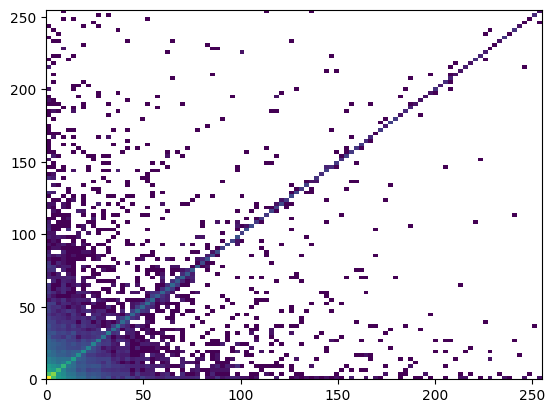

In [182]:
plt.hist2d(d.loc[:, "10000"], d.loc[:, "12000"], norm='log', bins=100)

In [183]:
df = pd.read_parquet('analysis.parquet.gzip')  

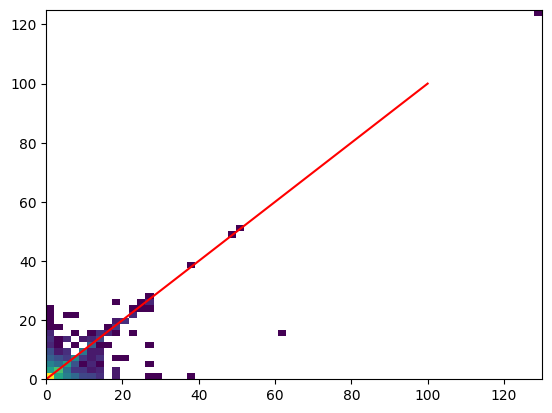

In [184]:
d = df[(df["30"].groupby(df.index.get_level_values(0)).transform('max') < 2) & (df["complexity"] > 0.5)]["longest_match"].unstack(-1)
plt.hist2d(d.loc[:, 11000], d.loc[:, 13000], norm='log', bins=60)
plt.plot([0,100], [0,100], c='red')
# d.loc[:, 10000]


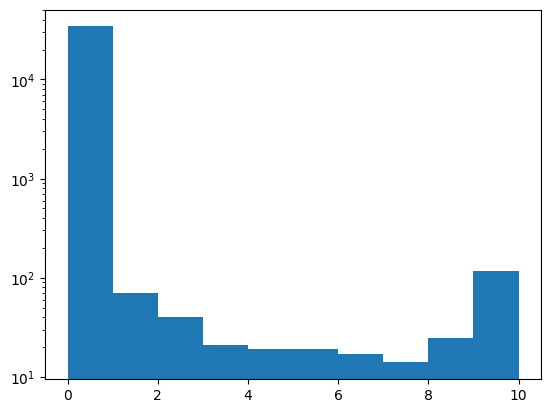

In [185]:
d =df[(df["complexity"] > 0.5)]
plt.hist((d["longest_match"] > 10).groupby(d.index.get_level_values(0)).sum())
plt.yscale('log')

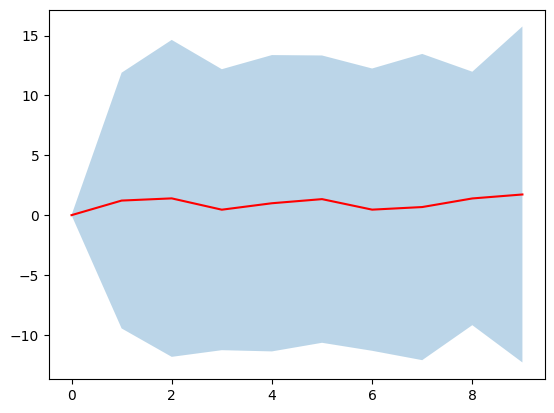

In [186]:
d = df[
         (df["10"].groupby(df.index.get_level_values(0)).transform('max') < 2) & 
         (df["longest_match"].groupby(df.index.get_level_values(0)).transform('max') > 10)
         ]["longest_match"].unstack(-1).to_numpy()
x = (d - d[:, 0][:, None])
m = x.mean(axis=0)
err = x.std(axis=0)
plt.fill_between(np.arange(10), m-err, m+err, alpha=0.3)
plt.plot(m, c='red')
# plt.plot(df[
#          (df["10"].groupby(df.index.get_level_values(0)).transform('max') < 2) & 
#          (df["longest_match"].groupby(df.index.get_level_values(0)).transform('max') > 10)
#          ]["longest_match"].unstack(-1).to_numpy().T);